In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv(r"D:\DATA SCIENCE\assignments\Titanic\datasets\titanic_cleaned_dataset.csv")

In [3]:
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,0,3,0,22.0,1,0,7.2500,0,0,0
1,1,1,1,1,38.0,1,0,71.2833,1,1,0
2,2,1,3,1,26.0,0,0,7.9250,0,1,1
3,3,1,1,1,35.0,1,0,53.1000,0,1,0
4,4,0,3,0,35.0,0,0,8.0500,0,0,1


In [4]:
df.columns

Index(['Unnamed: 0', 'survived', 'pclass', 'sex', 'age', 'sibsp', 'parch',
       'fare', 'embarked', 'who', 'alone'],
      dtype='object')

In [5]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [6]:
df.head(2)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,0,3,0,22.0,1,0,7.2500,0,0,0
1,1,1,1,38.0,1,0,71.2833,1,1,0


In [7]:
df.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'who', 'alone'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  889 non-null    int64  
 1   pclass    889 non-null    int64  
 2   sex       889 non-null    int64  
 3   age       889 non-null    float64
 4   sibsp     889 non-null    int64  
 5   parch     889 non-null    int64  
 6   fare      889 non-null    float64
 7   embarked  889 non-null    int64  
 8   who       889 non-null    int64  
 9   alone     889 non-null    int64  
dtypes: float64(2), int64(8)
memory usage: 69.6 KB


In [9]:
df.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
who         0
alone       0
dtype: int64

In [10]:
x=df.drop(['survived'],axis=1)
y=df['survived']

In [11]:
x

,pclass,sex,age,sibsp,parch,fare,embarked,who,alone
0,3,0,22.0,1,0,7.2500,0,0,0
1,1,1,38.0,1,0,71.2833,1,1,0
2,3,1,26.0,0,0,7.9250,0,1,1
3,1,1,35.0,1,0,53.1000,0,1,0
4,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
884,2,0,27.0,0,0,13.0000,0,0,1
885,1,1,19.0,0,0,30.0000,0,1,1
886,3,1,28.0,1,2,23.4500,0,1,0
887,1,0,26.0,0,0,30.0000,1,0,1


In [12]:
y

0      0
1      1
2      1
3      1
4      0
      ..
884    0
885    1
886    0
887    1
888    0
Name: survived, Length: 889, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
x_train.shape,x_test.shape

((666, 9), (223, 9))

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [16]:
x_train_scaled

array([[ 0.80392052,  1.37226706, -0.56928813, ..., -0.55216643,
         0.76066727,  0.82058932],
       [-0.40196026,  1.37226706,  1.57956903, ..., -0.55216643,
         0.76066727,  0.82058932],
       [-0.40196026, -0.72872113, -0.49254323, ..., -0.55216643,
        -0.73816232,  0.82058932],
       ...,
       [-1.60784105,  1.37226706,  1.42607923, ..., -0.55216643,
         0.76066727,  0.82058932],
       [ 0.80392052,  1.37226706, -0.64603302, ..., -0.55216643,
         0.76066727, -1.21863638],
       [-1.60784105, -0.72872113, -0.64603302, ..., -0.55216643,
        -0.73816232, -1.21863638]], shape=(666, 9))

Text(0.5, 1.0, 'x_train After Scaling')

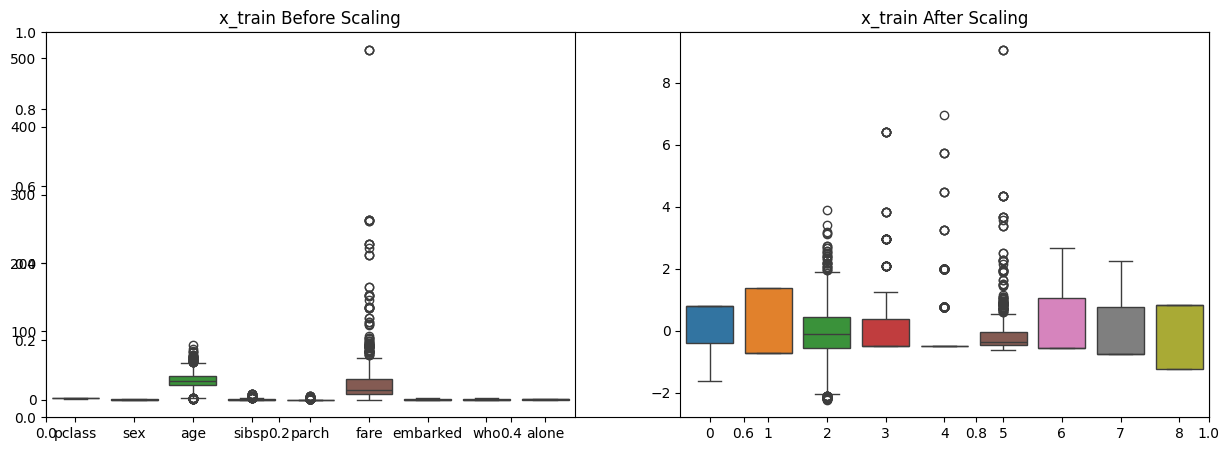

In [17]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=x_train)
plt.title('x_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=x_train_scaled)
plt.title('x_train After Scaling')

In [18]:
from sklearn.linear_model import LogisticRegression
logistic =LogisticRegression()
logistic.fit(x_train,y_train)

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [19]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [20]:
logistic.fit(x_train,y_train)
y_pred = logistic.predict(x_test)

C:\Users\ADMIN\AppData\Roaming\Python\Python313\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
score=accuracy_score(y_pred,y_test)
print(score)
print(classification_report(y_pred,y_test))
print(confusion_matrix(y_pred,y_test))

0.8116591928251121
              precision    recall  f1-score   support

           0       0.84      0.85      0.84       134
           1       0.77      0.75      0.76        89

    accuracy                           0.81       223
   macro avg       0.80      0.80      0.80       223
weighted avg       0.81      0.81      0.81       223

[[114  20]
 [ 22  67]]


In [22]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
svc.fit(x_train,y_train)

SVC(kernel='linear')

In [28]:
y_pred=svc.predict(x_test)
score=accuracy_score(y_pred,y_test)
print(score)

0.8251121076233184


In [24]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       136
           1       0.79      0.76      0.77        87

    accuracy                           0.83       223
   macro avg       0.82      0.81      0.82       223
weighted avg       0.82      0.83      0.82       223

[[118  18]
 [ 21  66]]


In [25]:
rbf=SVC(kernel='rbf')
rbf.fit(x_train,y_train)


SVC()

In [26]:
y_pred1=rbf.predict(x_test)
print(classification_report(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.65      0.90      0.76       136
           1       0.63      0.25      0.36        87

    accuracy                           0.65       223
   macro avg       0.64      0.58      0.56       223
weighted avg       0.64      0.65      0.60       223

[[123  13]
 [ 65  22]]


In [27]:
import pickle 
pickle.dump(logistic,open('logistic.pkl','wb'))
pickle.dump(scaler,open('scaler.pkl','wb'))